In [1]:
from numpy import mean
from numpy import std
from matplotlib import pyplot as plt
from sklearn.model_selection import KFold
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

In [2]:
### Load Dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(f"Train shape: {X_train.shape}, {y_train.shape}")
print(f"Test shape: {X_test.shape}, {y_test.shape}")

Train shape: (60000, 28, 28), (60000,)
Test shape: (10000, 28, 28), (10000,)


In [3]:
### reshape the dataset to make only single channel
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))

In [4]:
### One Hot Encoding the Labels
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [5]:
### Pixel data preparation
def prep_pixels(X_train,X_test):
  # Converting pixel value datatype to later narmalize
  X_train_float = X_train.astype('float32')
  X_test_float = X_test.astype('float32')
  # Normalize the pixel values of grayscale images to range  0-1
  X_train_norm = X_train_float/255.0
  X_test_norm = X_test_float/255.0
  # return normalized images
  return X_train_norm, X_test_norm

In [6]:
### define CNN model
"""
  The model has two ends.
  The front end accounts for feature extraction and is comprised of convolutional layers and pooling layers.
  The rear end accounts for classification and is comprised of fully connected layers.

  We have to decide the capacity of both the parts to determine what combination gives the best results.
  We can increase any of the parts' complexity check what gives better results.
  Generally adding to convolutional layers gives better increase in results.

  Batch Normailzation can be used after convolutional layers and fully connected layers as it reduces training times.
"""
def define_model():
  model = Sequential()
  model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
  model.add(BatchNormalization())
  model.add(MaxPooling2D((2, 2)))
  model.add(Flatten())
  model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
  model.add(BatchNormalization())
  model.add(Dense(10, activation='softmax'))
  # Model Compilation
  opt = SGD(learning_rate=0.01, momentum=0.9)
  model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
  return model

In [7]:
### evaluating the model using K-Fold cross validation
def evaluate_model(X_data, y_data, n_folds = 5):
  scores, histories = [], []
  kfold = KFold(n_folds, shuffle=True, random_state = 1)

  for train_i, test_i in kfold.split(X_data):
    model = define_model()
    # split the data according to the fold info
    X_train, y_train, X_test, y_test = X_data[train_i], y_data[train_i], X_data[test_i], y_data[test_i]
    history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), verbose=1)
    _, acc = model.evaluate(X_data, y_data, verbose=1)
    print(f'-> {acc * 100.0:.3f}')
    scores.append(acc)
    histories.append(history)
  return scores, histories

In [8]:
### plot diagnostic learning curves
def performance_plots(histories):
  for i in range(len(histories)):

    # ploting the loss
    plt.subplot(2, 1, 1)
    plt.title('Cross Entropy Loss')
    plt.plot(histories[i].history['loss'], color='blue', label='train')
    plt.plot(histories[i].history['val_loss'], color='orange', label='test')

    # plotting the accuracy
    plt.subplot(2, 1, 2)
    plt.title('Classification Accuracy')
    plt.plot(histories[i].history['accuracy'], color='blue', label='train')
    plt.plot(histories[i].history['val_accuracy'], color='orange', label='test')

    plt.show()

In [9]:
### Summarizing the model performance
def summarize_performance(scores):
 print(f'Accuracy: avg={mean(scores)*100:.3f} std={std(scores)*100:.3f}, n={len(scores)}')
 # plots of results
 plt.boxplot(scores)
 plt.show()

In [10]:
def run_test(X_train, X_test, y_train, y_test):
 # pixel data preparation
 X_train, X_test = prep_pixels(X_train, X_test)
 # model evaluation
 scores, histories = evaluate_model(X_train, y_train)
 # plotting the learning curves
 performance_plots(histories)
 # summarizing the estimated performance
 summarize_performance(scores)

Epoch 1/10
1500/1500 [==============================] - 43s 28ms/step - loss: 0.1335 - accuracy: 0.9596 - val_loss: 0.0696 - val_accuracy: 0.9790
Epoch 2/10
1500/1500 [==============================] - 35s 23ms/step - loss: 0.0493 - accuracy: 0.9852 - val_loss: 0.0613 - val_accuracy: 0.9814
Epoch 3/10
1500/1500 [==============================] - 35s 23ms/step - loss: 0.0279 - accuracy: 0.9915 - val_loss: 0.0533 - val_accuracy: 0.9848
Epoch 4/10
1500/1500 [==============================] - 36s 24ms/step - loss: 0.0190 - accuracy: 0.9943 - val_loss: 0.0550 - val_accuracy: 0.9835
Epoch 5/10
1500/1500 [==============================] - 35s 23ms/step - loss: 0.0131 - accuracy: 0.9962 - val_loss: 0.0566 - val_accuracy: 0.9834
Epoch 6/10
1500/1500 [==============================] - 37s 25ms/step - loss: 0.0093 - accuracy: 0.9975 - val_loss: 0.0544 - val_accuracy: 0.9852
Epoch 7/10
1500/1500 [==============================] - 35s 24ms/step - loss: 0.0074 - accuracy: 0.9983 - val_loss: 0.0522 -

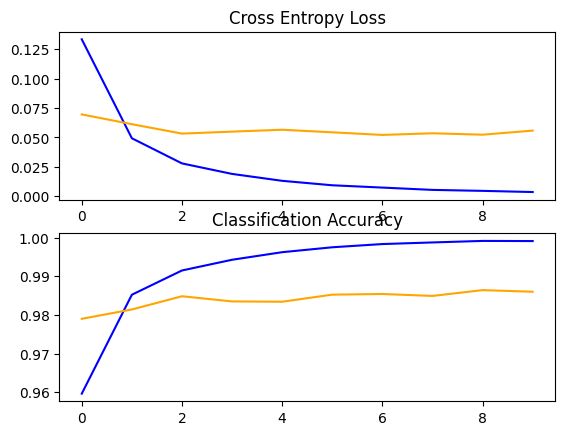

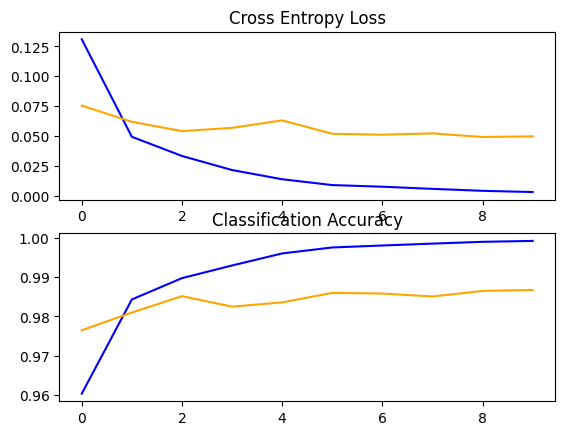

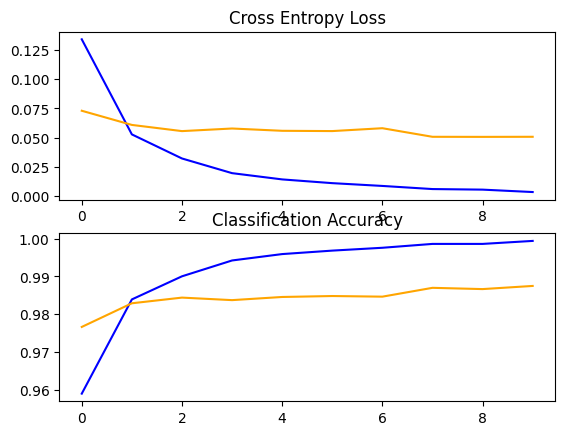

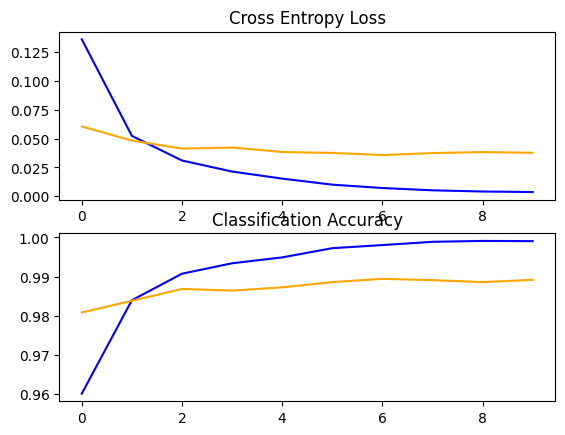

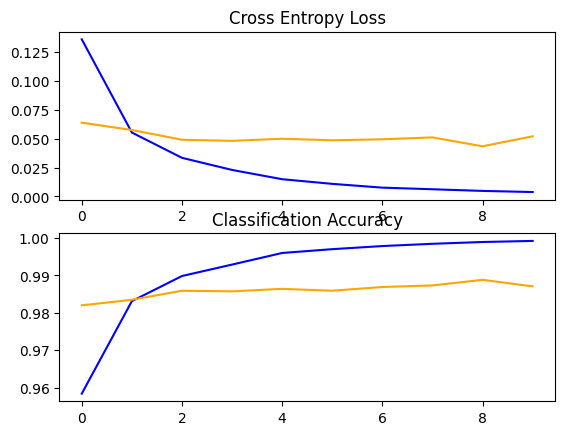

Accuracy: avg=99.732 std=0.027, n=5


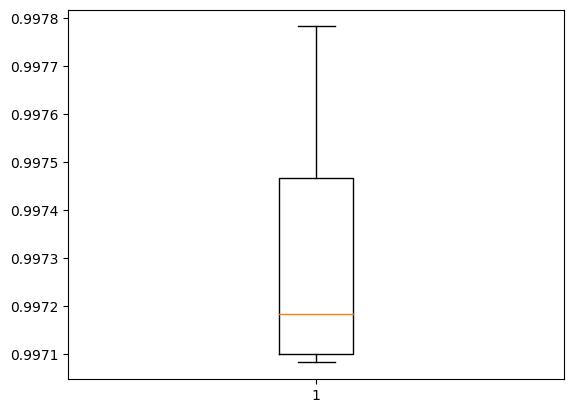

In [11]:
run_test(X_train, X_test, y_train, y_test)